In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Generate random transaction data
np.random.seed(0)

# Generate random transaction amounts
transaction_amounts = np.random.uniform(low=1, high=10000, size=500)

# Generate random transaction times between 2020 and 2024
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 12, 31)
time_stamps = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(500)]

# Generate random user descriptors
user_descriptors = [f"user_{i}" for i in range(500)]

# Generate random labels for genuine or fraudulent transactions
labels = np.random.choice(['genuine', 'fraudulent'], size=500, p=[0.95, 0.05])

# Create DataFrame
data = {
    'Transaction_Amount': transaction_amounts,
    'Time': time_stamps,
    'User_Descriptors': user_descriptors,
    'Label': labels
}

df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('transaction_data.csv', index=False)


Model: Logistic Regression
Accuracy: 0.96
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
ROC AUC: 0.51

Confusion Matrix for Logistic Regression:
[[ 0  4]
 [ 0 96]]

Model: SVM
Accuracy: 0.96
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
ROC AUC: 0.41

Confusion Matrix for SVM:
[[ 0  4]
 [ 0 96]]

Model: Random Forest
Accuracy: 0.90
Precision: 0.96
Recall: 0.94
F1 Score: 0.95
ROC AUC: 0.50

Confusion Matrix for Random Forest:
[[ 0  4]
 [ 6 90]]



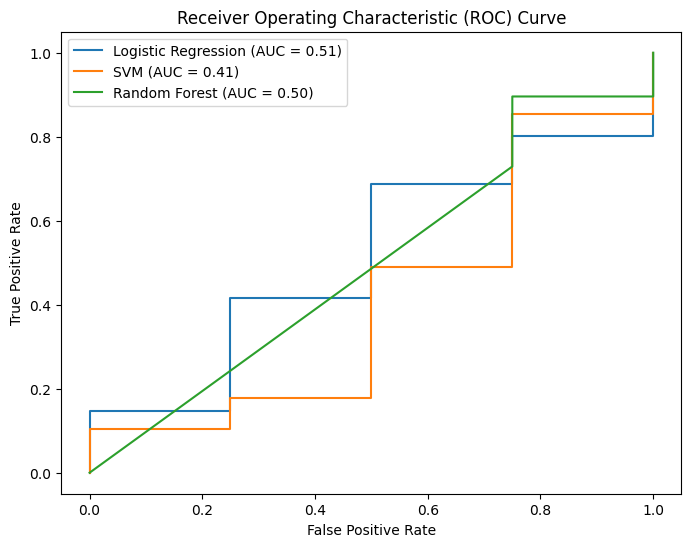

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import joblib
import matplotlib.pyplot as plt

# Generate random transaction data
np.random.seed(0)
transaction_amounts = np.random.uniform(low=1, high=10000, size=500)
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 12, 31)
time_stamps = [start_date + timedelta(days=np.random.randint((end_date - start_date).days)) for _ in range(500)]
user_descriptors = [f"user_{i}" for i in range(500)]
labels = np.random.choice(['genuine', 'fraudulent'], size=500, p=[0.95, 0.05])

# Create DataFrame
df = pd.DataFrame({
    'Transaction_Amount': transaction_amounts,
    'Time': time_stamps,
    'User_Descriptors': user_descriptors,
    'Label': labels
})

# Feature Engineering
df['Hour_of_the_Day'] = df['Time'].dt.hour
scaler = StandardScaler()
df[['Transaction_Amount', 'Hour_of_the_Day']] = scaler.fit_transform(df[['Transaction_Amount', 'Hour_of_the_Day']])

# Model Training and Validation
X_train, X_test, y_train, y_test = train_test_split(df[['Transaction_Amount', 'Hour_of_the_Day']], df['Label'], test_size=0.2, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier()
}

plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train, y_train_encoded)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred)
    recall = recall_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred)
    roc_auc = roc_auc_score(y_test_encoded, model.predict_proba(X_test)[:, 1])
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print()

    cm = confusion_matrix(y_test_encoded, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    print()

    fpr, tpr, _ = roc_curve(y_test_encoded, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Model Persistence
for name, model in models.items():
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_model.pkl')
